<a href="https://colab.research.google.com/github/Tshah-hf/TS_HF_LACC_PROJECT/blob/main/Tru_Project_CDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline


In [2]:
missing_values=['?','Unknown/Invalid']
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv",na_values = missing_values)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
df.head(50)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
5,35754,82637451,Caucasian,Male,[50-60),NaN,2,1,2,3,NaN,NaN,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Yes,>30
6,55842,84259809,Caucasian,Male,[60-70),NaN,3,1,2,4,NaN,NaN,70,1,21,0,0,0,414,411,V45,7,None,None,Steady,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
7,63768,114882984,Caucasian,Male,[70-80),NaN,1,1,7,5,NaN,NaN,73,0,12,0,0,0,428,492,250,8,None,None,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,>30
8,12522,48330783,Caucasian,Female,[80-90),NaN,2,1,4,13,NaN,NaN,68,2,28,0,0,0,398,427,38,8,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO
9,15738,63555939,Caucasian,Female,[90-100),NaN,3,3,4,12,NaN,InternalMedicine,33,3,18,0,0,0,434,198,486,8,None,None,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [4]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [5]:
# creating new data frame
drop_cols = ['patient_nbr','weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']
df.drop(drop_cols, inplace = True, axis = 1)

In [6]:
df.head(50)

,encounter_id,race,gender,age
0,2278392,Caucasian,Female,[0-10)
1,149190,Caucasian,Female,[10-20)
2,64410,AfricanAmerican,Female,[20-30)
3,500364,Caucasian,Male,[30-40)
4,16680,Caucasian,Male,[40-50)
5,35754,Caucasian,Male,[50-60)
6,55842,Caucasian,Male,[60-70)
7,63768,Caucasian,Male,[70-80)
8,12522,Caucasian,Female,[80-90)
9,15738,Caucasian,Female,[90-100)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   encounter_id  101766 non-null  int64 
 1   race          99493 non-null   object
 2   gender        101763 non-null  object
 3   age           101766 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [9]:
df.shape

(101766, 4)

In [10]:
df['encounter_id'] = pd.to_numeric(df['encounter_id'], errors = 'coerce')

In [11]:
df['age']= df['age'].str.strip('[)')

In [12]:
df.head(50)

,encounter_id,race,gender,age
0,2278392,Caucasian,Female,0-10
1,149190,Caucasian,Female,10-20
2,64410,AfricanAmerican,Female,20-30
3,500364,Caucasian,Male,30-40
4,16680,Caucasian,Male,40-50
5,35754,Caucasian,Male,50-60
6,55842,Caucasian,Male,60-70
7,63768,Caucasian,Male,70-80
8,12522,Caucasian,Female,80-90
9,15738,Caucasian,Female,90-100


In [13]:
df.dropna().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         encounter_id             race  gender    age
0            2278392        Caucasian  Female   0-10
1             149190        Caucasian  Female  10-20
2              64410  AfricanAmerican  Female  20-30
3             500364        Caucasian    Male  30-40
4              16680        Caucasian    Male  40-50
...              ...              ...     ...    ...
101761     443847548  AfricanAmerican    Male  70-80
101762     443847782  AfricanAmerican  Female  80-90
101763     443854148        Caucasian    Male  70-80
101764     443857166        Caucasian  Female  80-90
101765     443867222        Caucasian    Male  70-80

[99492 rows x 4 columns]>

In [14]:
df.head()

,encounter_id,race,gender,age
0,2278392,Caucasian,Female,0-10
1,149190,Caucasian,Female,10-20
2,64410,AfricanAmerican,Female,20-30
3,500364,Caucasian,Male,30-40
4,16680,Caucasian,Male,40-50


In [15]:
#sort and group
df.sort_values(['gender','race'], ascending=[True,False])

,encounter_id,race,gender,age
25,221634,Other,Female,50-60
98,1257282,Other,Female,50-60
106,1445010,Other,Female,50-60
136,2294130,Other,Female,60-70
271,2970666,Other,Female,50-60
...,...,...,...,...
101702,443186306,NaN,Male,70-80
101715,443226344,NaN,Male,50-60
30506,98634858,Other,NaN,70-80
75551,226864668,NaN,NaN,60-70


In [17]:
df3 = df.groupby(['race','age']).size()
print(df3)

race             age   
AfricanAmerican  0-10         16
                 10-20       209
                 20-30       540
                 30-40      1223
                 40-50      2787
                 50-60      4225
                 60-70      4232
                 70-80      3816
                 80-90      1817
                 90-100      345
Asian            0-10          2
                 10-20         2
                 20-30         6
                 30-40        15
                 40-50        52
                 50-60       123
                 60-70       160
                 70-80       180
                 80-90        90
                 90-100       11
Caucasian        0-10        136
                 10-20       438
                 20-30       975
                 30-40      2203
                 40-50      6131
                 50-60     11835
                 60-70     16693
                 70-80     20761
                 80-90     14602
                 90

In [18]:
df2 = df.groupby(['race'])['encounter_id'].count().sort_values(ascending=True)
df2

race
Asian                641
Other               1506
Hispanic            2037
AfricanAmerican    19210
Caucasian          76099
Name: encounter_id, dtype: int64

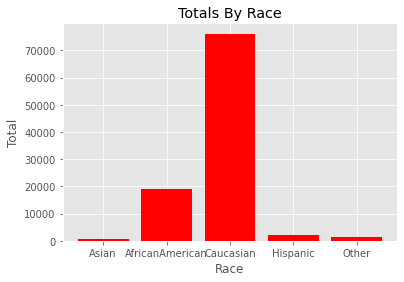

In [19]:
#graph matplotlib
plt.style.use('ggplot')
x=['Asian','AfricanAmerican','Caucasian','Hispanic','Other']
Total=[641,19210,76099,2037,1506]
x_pos = [i for i,_ in enumerate(x)]
plt.bar(x_pos,Total,color='red')
plt.xlabel("Race")
plt.ylabel('Total')
plt.title('Totals By Race')
plt.xticks(x_pos,x)
plt.show()

In [20]:
df4 = df.groupby(['gender','age']).size()
print(df4)

gender  age   
Female  0-10         83
        10-20       402
        20-30      1114
        30-40      2162
        40-50      4811
        50-60      8572
        60-70     11061
        70-80     13985
        80-90     10515
        90-100     2003
Male    0-10         78
        10-20       289
        20-30       543
        30-40      1613
        40-50      4874
        50-60      8684
        60-70     11421
        70-80     12081
        80-90      6682
        90-100      790
dtype: int64


In [21]:
df5 = df.groupby(['gender'])['encounter_id'].count().sort_values(ascending=True)
df5

gender
Male      47055
Female    54708
Name: encounter_id, dtype: int64

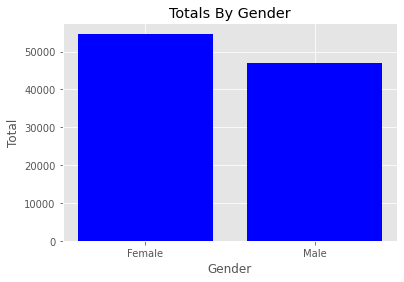

In [23]:
#graph matplotlib
plt.style.use('ggplot')
x=['Female','Male']
Total=[54708,47055]
x_pos = [i for i,_ in enumerate(x)]
plt.bar(x_pos,Total,color='Blue')
plt.xlabel("Gender")
plt.ylabel('Total')
plt.title('Totals By Gender')
plt.xticks(x_pos,x)
plt.show()

In [ ]:
## CDC data analysis by gender and race indicate female have higher total of diabetic and Caucasian have highest number of encounters for cdc compared to other race